In [1]:
# Importing all the essential Python libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime
import yfinance as yf

In [2]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [3]:
# Importing HDFC Bank stock prices using yfinance

HDFC = yf.download('HDFCBANK.NS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Some Basic info about the HDFC Bank Stock

HDFC.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,1581.067116,1590.319469,1603.459219,1576.825411,1589.346927,2.108800e+07
std,112.836212,107.232891,107.705017,106.706598,108.062861,1.750554e+07
min,1365.404785,1384.050049,1391.500000,1363.550049,1376.000000,8.798460e+05
25%,1474.564087,1490.987488,1512.237518,1480.200012,1492.375000,1.309700e+07
50%,1617.200012,1622.000000,1634.075012,1610.099976,1623.724976,1.722489e+07
75%,1662.794403,1670.874969,1682.674988,1654.024994,1671.287476,2.322712e+07
max,1783.449951,1783.449951,1794.000000,1768.050049,1791.000000,2.226710e+08


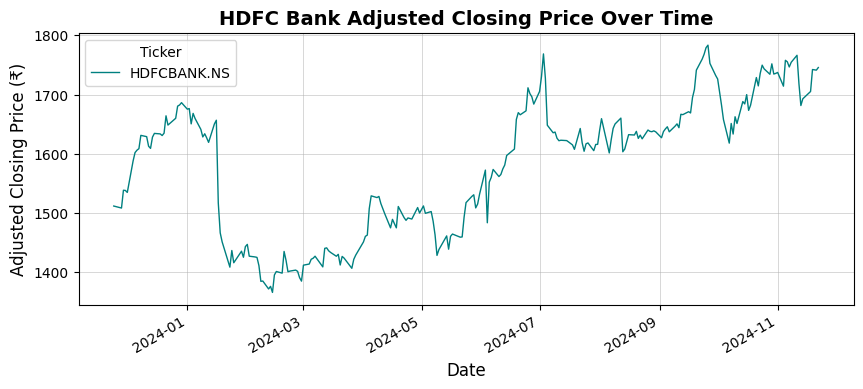

In [5]:
# Plotting Adjusted Closing Price for HDFC Bank Stock

HDFC['Adj Close'].plot(legend=True, figsize=(10, 4), color='teal', linewidth=1)

plt.title("HDFC Bank Adjusted Closing Price Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Closing Price (₹)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(["HDFCBANK.NS"], loc='upper left', fontsize=10)
legend.set_title("Ticker", prop={'size': 10})

plt.show()

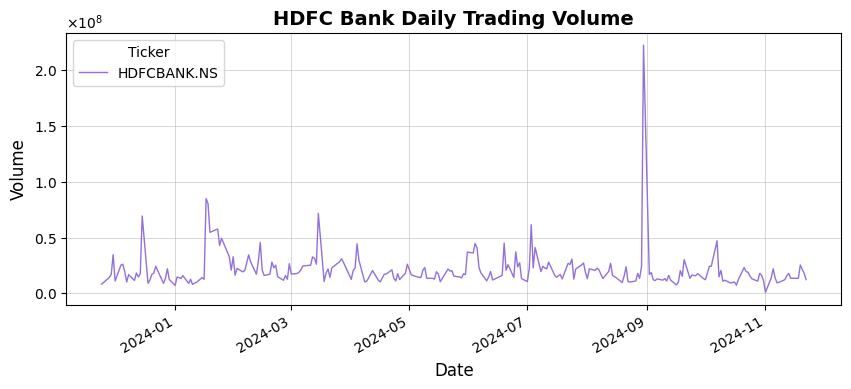

In [6]:
# Plotting the total volume of HDFC Bank stock being traded each day

HDFC['Volume'].plot(legend=True, figsize=(10, 4), color='mediumpurple', linewidth=1)

plt.title("HDFC Bank Daily Trading Volume", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(["HDFCBANK.NS"], loc='upper left', fontsize=10)
legend.set_title("Ticker", prop={'size': 10})

plt.show()

In [7]:
# Calculating Moving Average for 10, 20, and 50 days of the stock price

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    HDFC[column_name] = HDFC['Adj Close'].rolling(window=ma).mean()

HDFC.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,,,
Date,,,,,,,,,
2023-11-24,1511.460327,1532.099976,1533.150024,1519.849976,1521.199951,8234596,NaN,NaN,NaN
2023-11-28,1508.056885,1528.650024,1537.250000,1525.800049,1535.199951,14244669,NaN,NaN,NaN
2023-11-29,1538.145996,1559.150024,1563.000000,1533.000000,1533.900024,17021244,NaN,NaN,NaN
2023-11-30,1537.800659,1558.800049,1572.449951,1542.150024,1569.150024,34745720,NaN,NaN,NaN
2023-12-01,1534.446533,1555.400024,1565.750000,1552.099976,1557.900024,11076768,NaN,NaN,NaN


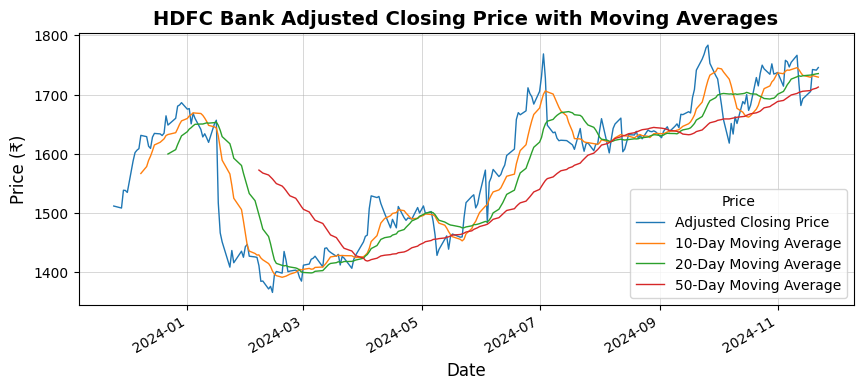

In [8]:
# Plotting the moving averages and Adjusted Closing Price for HDFC Bank Stock

HDFC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10, 4), linewidth=1)

plt.title("HDFC Bank Adjusted Closing Price with Moving Averages", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(
    ["Adjusted Closing Price", "10-Day Moving Average", "20-Day Moving Average", "50-Day Moving Average"], 
    loc='lower right', 
    fontsize=10
)
legend.set_title("Price", prop={'size': 10})

plt.show()

In [9]:
# Calculate Daily Returns

HDFC['Daily Return'] = HDFC['Adj Close'].pct_change()

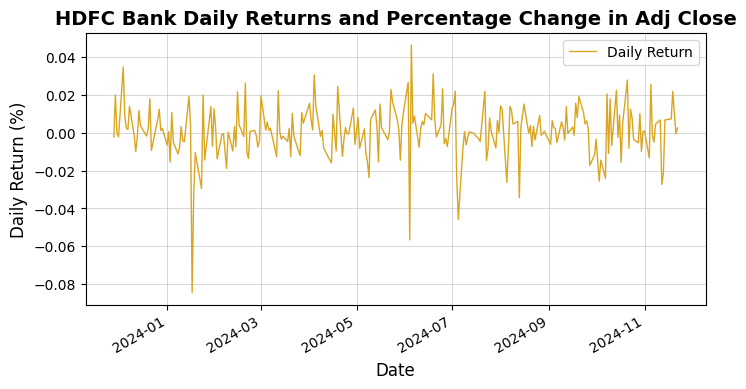

In [10]:
# Plotting Daily Returns as a function of Percent Change in Adjusted Close Value

HDFC['Daily Return'].plot(figsize=(8, 4), color='goldenrod', linewidth=1)

plt.title("HDFC Bank Daily Returns and Percentage Change in Adj Close", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.legend(["Daily Return"], loc='upper right', fontsize=10)

plt.show()

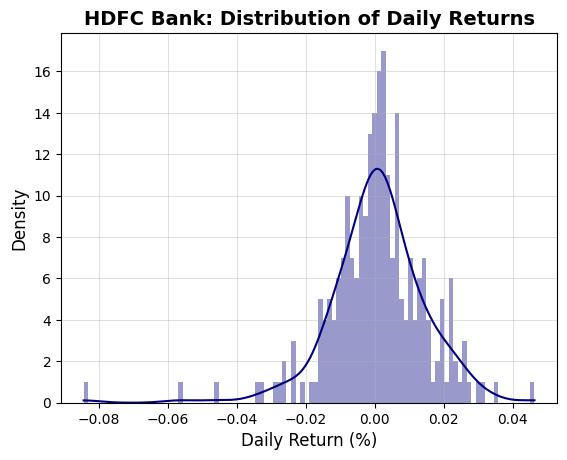

In [11]:
# Plotting the average daily returns of the stock

sns.histplot(HDFC['Daily Return'].dropna(), bins=100, kde=True, edgecolor=None, alpha=0.4, color='navy', linewidth=1)

plt.title("HDFC Bank: Distribution of Daily Returns", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.4)

plt.show()

In [12]:
# Comparing Risk and Expected returns

rets = HDFC['Daily Return'].dropna()
area = np.pi*15

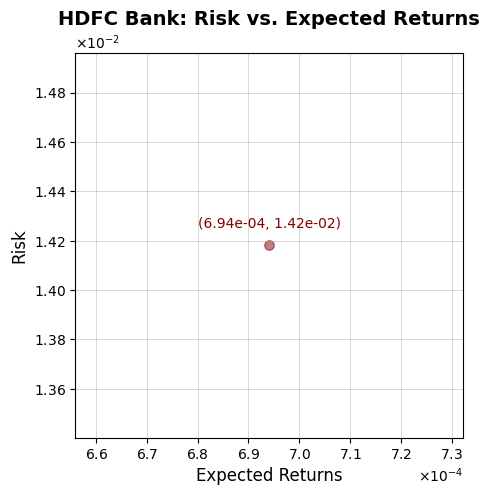

In [13]:
# Creating the scatter plot

plt.figure(figsize=(5, 5))
plt.scatter(rets.mean(), rets.std(), s=area, color='maroon', alpha=0.5)
plt.title("HDFC Bank: Risk vs. Expected Returns", fontsize=14, fontweight='bold')

# Mean of Daily Returns
plt.xlabel("Expected Returns", fontsize=12)

# Standard Deviation of Daily Returns
plt.ylabel("Risk", fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='x', scilimits=(0, 0))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

coords_text = f"({rets.mean():.2e}, {rets.std():.2e})"
plt.annotate(coords_text,xy=(rets.mean(), rets.std()),xytext=(rets.mean(), rets.std() + 0.00007), fontsize=10, ha='center', color='maroon')

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [14]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

HDFC['Daily Return'].quantile(0.05)

-0.02118333915030521

In [15]:
# Monte Carlo Simulation

days = 365
dt = 1/days
mu = rets.mean()
sigma = rets.std()

In [16]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

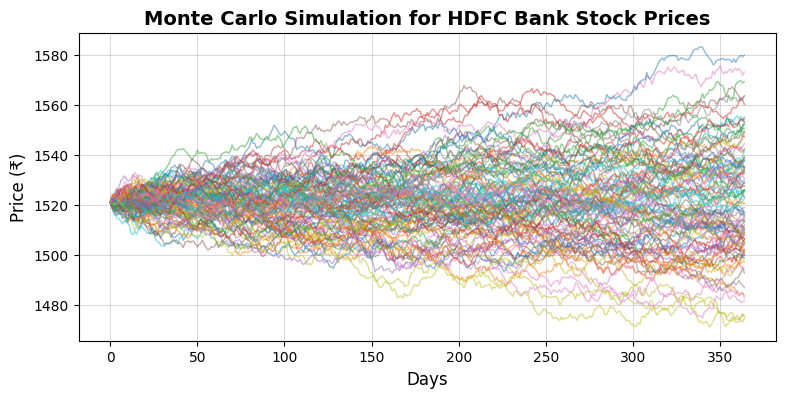

In [18]:
# Running the Monte Carlo simulation a hundred times

start_price = HDFC['Open'].iloc[0].item()

# Monte Carlo Simulation Plot
plt.figure(figsize=(9, 4))

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), linewidth=1, alpha=0.5)

plt.title("Monte Carlo Simulation for HDFC Bank Stock Prices", fontsize=14, weight='bold')
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [19]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

q = np.percentile(simulations,1)

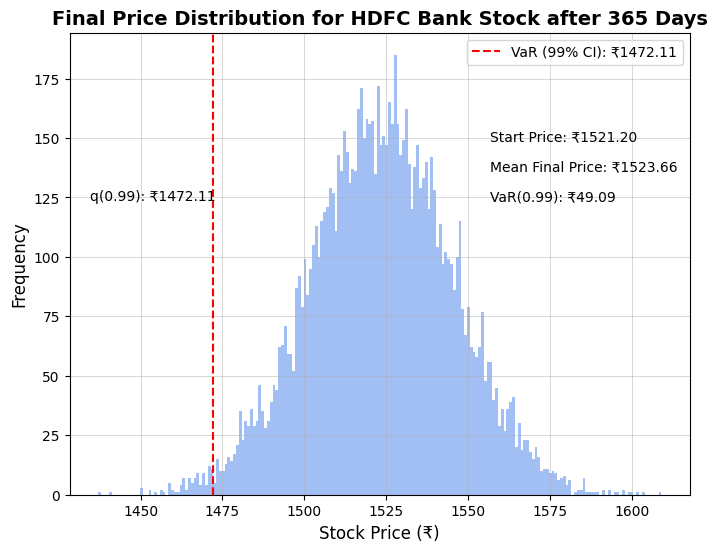

In [20]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.figure(figsize=(8, 6))

plt.hist(simulations, bins=200, color='cornflowerblue', alpha=0.6)

plt.figtext(0.65, 0.7, s=f"Start Price: ₹{start_price:.2f}", fontsize=10, color='black')
plt.figtext(0.65, 0.65, s=f"Mean Final Price: ₹{simulations.mean():.2f}", fontsize=10, color='black')
plt.figtext(0.65, 0.6, s=f"VaR(0.99): ₹{start_price - q:.2f}", fontsize=10, color='black')
plt.figtext(0.15, 0.6, s=f"q(0.99): ₹{q:.2f}", fontsize=10, color='black')

plt.axvline(x=q, linewidth=1.5, color='red', linestyle='--', label=f"VaR (99% CI): ₹{q:.2f}")

plt.title(f"Final Price Distribution for HDFC Bank Stock after {days} Days", fontsize=14, weight='bold')
plt.xlabel("Stock Price (₹)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend(loc="upper right", fontsize=10)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()